<a href="https://colab.research.google.com/github/shivushivu24092004-sys/ToDoListp1/blob/master/ML_Model_Regression_using_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pyspark

In [12]:
# import os
# os.environ["JAVA_HOME"]="/lib/jvm/java-11-openjdk-amd64"

In [13]:
# Install PySpark and required dependencies
!pip install pyspark findspark

# Import necessary libraries
import findspark
findspark.init()

In [14]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [15]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, count, sum, max, min
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
import pandas as pd

In [16]:


# Initialize Spark Session
sc = SparkSession.builder \
    .appName("PySpark Basics Tutorial") \
    .master("local[*]") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

print("Spark Session Created Successfully!")
print(f"Spark Version: {sc.version}")

Spark Session Created Successfully!
Spark Version: 3.5.1


In [17]:
conf = SparkConf().set('spark.ui.port', '4050').setAppName("films").setMaster("local[2]")
sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)
#sc.stop()

/usr/local/lib/python3.12/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [18]:
from google.colab import files
import os

# Check if Boston.csv exists, if not, prompt for upload
if not os.path.exists('Boston.csv'):
    uploaded = files.upload()
    if 'Boston.csv' not in uploaded:
        print("Boston.csv not uploaded. Please upload the file to proceed.")
    else:
        print("Boston.csv uploaded successfully.")
else:
    print("Boston.csv already exists.")

house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('Boston.csv')
house_df.show()

Boston.csv already exists.
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|

In [19]:
## Printing schema
house_df.cache()
house_df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [20]:
## Descriptive analysis
house_df.toPandas()

,_c0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


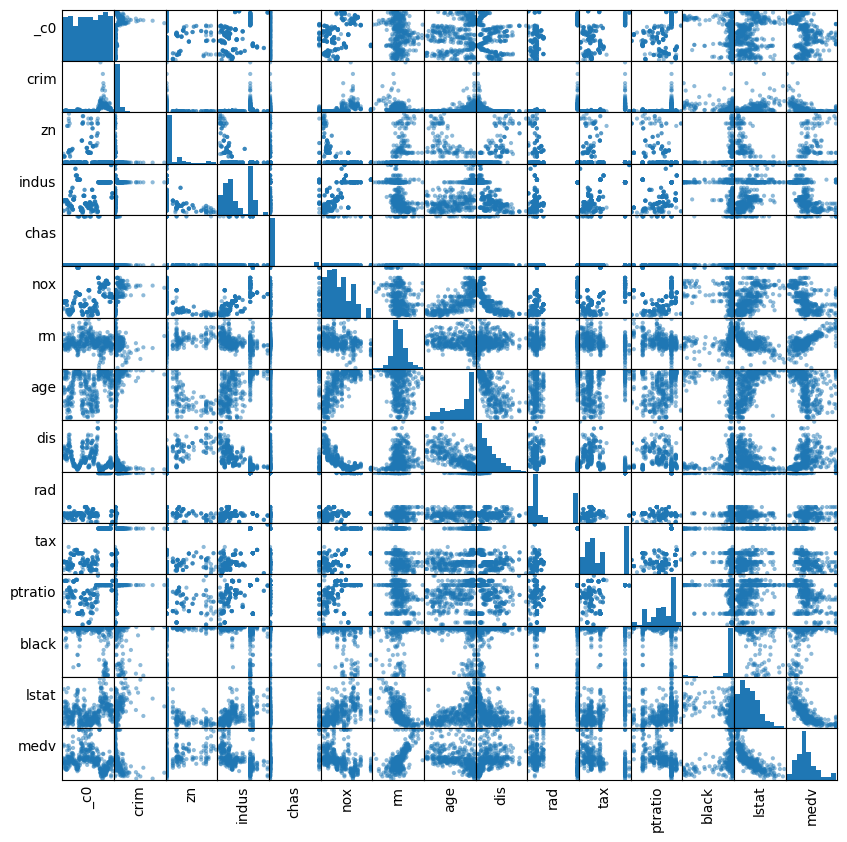

In [21]:
import pandas as pd
from matplotlib import cm
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [22]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [23]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to medv for ", i, house_df.stat.corr('medv',i))

Correlation to medv for  _c0 -0.22660364293533927
Correlation to medv for  crim -0.38830460858681154
Correlation to medv for  zn 0.3604453424505433
Correlation to medv for  indus -0.4837251600283728
Correlation to medv for  chas 0.1752601771902987
Correlation to medv for  nox -0.4273207723732821
Correlation to medv for  rm 0.6953599470715401
Correlation to medv for  age -0.3769545650045961
Correlation to medv for  dis 0.249928734085904
Correlation to medv for  rad -0.38162623063977735
Correlation to medv for  tax -0.46853593356776674
Correlation to medv for  ptratio -0.5077866855375622
Correlation to medv for  black 0.3334608196570661
Correlation to medv for  lstat -0.7376627261740145
Correlation to medv for  medv 1.0


In [24]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
#train_df,test_df=vhouse_df.randomSplit([0.7,0.3])

In [25]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.09804217896035437,0.030977444088059337,0.0036272743607566713,2.4130811176428724,-16.671941586313405,3.879675851798998,0.004792265667846117,-1.311472933175254,0.2765172681457442,-0.01183839209081545,-0.8731387323535422,0.008963269633572489,-0.5046222322045985]
Intercept: 33.450040694778565


In [26]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.614617
r2: 0.725599


In [27]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|27.031514904059705|22.0|[0.01096,55.0,2.2...|
| 30.41701573212484|32.7|[0.01301,35.0,1.5...|
|30.545244330530668|35.4|[0.01311,90.0,1.2...|
|15.366314849144661|18.9|[0.0136,75.0,4.0,...|
| 30.87169014880652|29.1|[0.01439,60.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.761388


In [28]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 0
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  -5.961123248005727|
|  1.4851356460486507|
|   10.25998932381571|
|  -0.515182569839503|
| -2.5521845495306863|
|   7.593691560969766|
| -1.6926476294365607|
|   8.696596876499964|
| 0.11547938397293933|
| 0.17776788644705377|
|  -6.286834293337936|
|   3.758381600636465|
| -3.9207073174763316|
|  0.3127047513106582|
|  3.8737012973199043|
| -1.4755843602716752|
|   2.994029641746618|
|-0.03944297195729973|
|  4.2346083579175975|
| -2.0039710591846713|
+--------------------+
only showing top 20 rows



In [29]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|27.031514904059705|22.0|[0.01096,55.0,2.2...|
| 30.41701573212484|32.7|[0.01301,35.0,1.5...|
|30.545244330530668|35.4|[0.01311,90.0,1.2...|
|15.366314849144661|18.9|[0.0136,75.0,4.0,...|
| 30.87169014880652|29.1|[0.01439,60.0,2.9...|
| 43.11643736959527|50.0|[0.01501,90.0,1.2...|
|25.280716731187493|30.1|[0.01709,90.0,2.0...|
|29.814742396624368|32.9|[0.01778,95.0,1.4...|
| 41.73994781844294|50.0|[0.02009,95.0,2.6...|
| 36.04134670326271|42.3|[0.02177,82.5,2.0...|
| 31.41013534967533|31.1|[0.02187,60.0,2.9...|
|27.396371231418144|23.9|[0.02543,55.0,3.7...|
| 28.49808516564421|25.0|[0.02875,28.0,15....|
|25.873739317049203|28.7|[0.02985,0.0,2.18...|
|29.256787045416683|34.9|[0.0315,95.0,1.47...|
|20.716317800987404|19.5|[0.03427,0.0,5.19...|
|28.336718418454737|24.1|[0.03445,82.5,2.0...|
| 32.45086550844386|28.5|[0.03502,80.0,4.9...|
| 40.59317423

## Decision tree regression

In [30]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 6.42551


In [31]:
lr_evaluator.evaluate(dt_predictions)

0.5894338111872145

In [32]:
dt_model.featureImportances

SparseVector(13, {0: 0.0301, 2: 0.0148, 4: 0.0305, 5: 0.5965, 6: 0.0031, 7: 0.0304, 10: 0.0106, 11: 0.0016, 12: 0.2825})

In [33]:
house_df.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

## Gradient-boosted tree regression

In [34]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 23.21540336812767|22.0|[0.01096,55.0,2.2...|
| 34.33622227530006|32.7|[0.01301,35.0,1.5...|
| 35.48188620873904|35.4|[0.01311,90.0,1.2...|
|14.753070658650577|18.9|[0.0136,75.0,4.0,...|
| 25.80697699853814|29.1|[0.01439,60.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows



In [35]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 6.12672
